In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18,16)


In [2]:
data = pd.read_csv('/mnt/8C24EDC524EDB1FE/data/sna/Datathon_2018_Dataset_Hashbyte_New.csv',sep=';')
data.head()

,Subscriber_A,Subsciber_B,Label,Real_Event_Flag
0,0xFC1A79880148D5D3FBC989C90F9D99AE,0x60358E62F5C03EC19AD81C54915AE0B4,Low,0
1,0xFC1A79880148D5D3FBC989C90F9D99AE,0x60358E62F5C03EC19AD81C54915AE0B4,Low,0
2,0xFC1A79880148D5D3FBC989C90F9D99AE,0x542A679EA6DC3752D01E4C40A6DC2708,Low,0
3,0x62E0C33CB0F9327FE8EE5FA064DAF69F,0x03D6B65B220C904678732E5439346F48,Low,0
4,0x2F23F291B052F4CEE0B213F97C25CA4E,0xDBCE45BBADC9DB251F11633CC054DDF3,Low,0


In [5]:
len(data['Subscriber_A'].unique())

54595

In [20]:
real_data = data[data['Real_Event_Flag']>0]
real_data.keys()

Index(['Subscriber_A', 'Subsciber_B', 'Label', 'Real_Event_Flag'], dtype='object')

Let's check if the subscriber A value counts are Zipfian

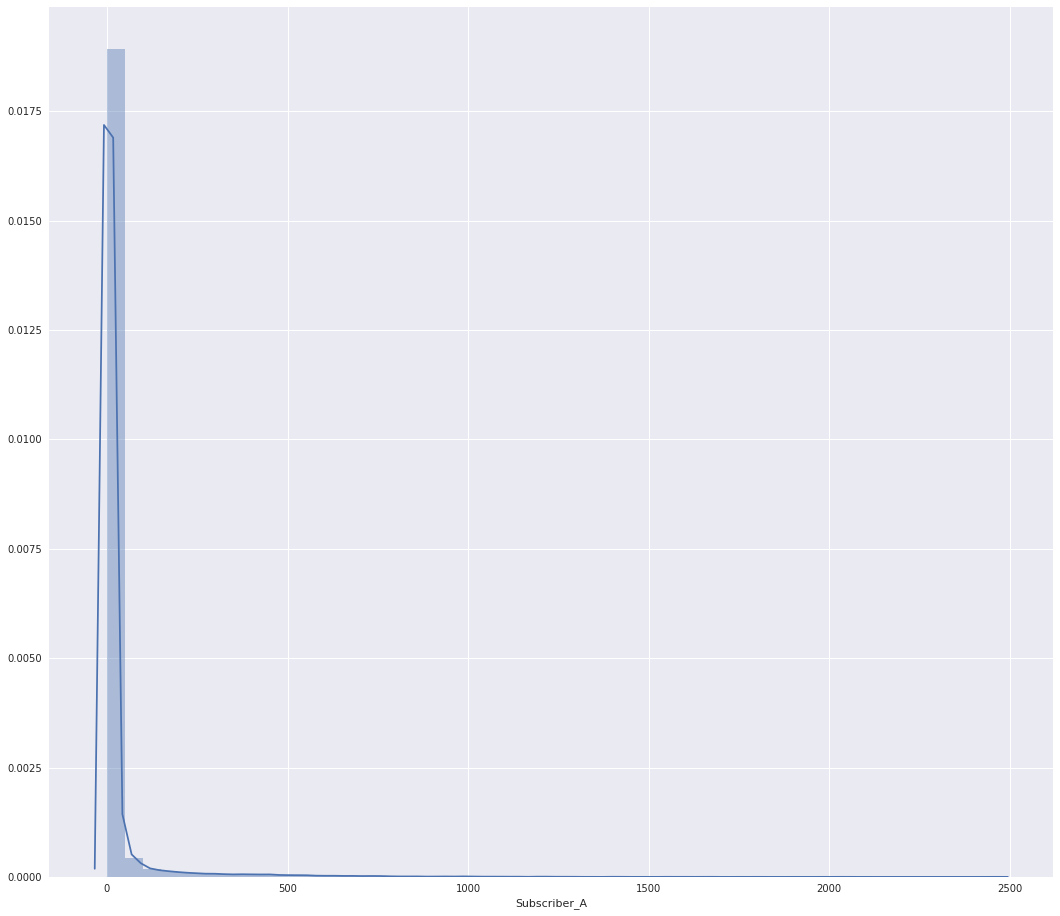

In [15]:
vc1 = real_data['Subscriber_A'].value_counts()
sns.distplot(vc1)

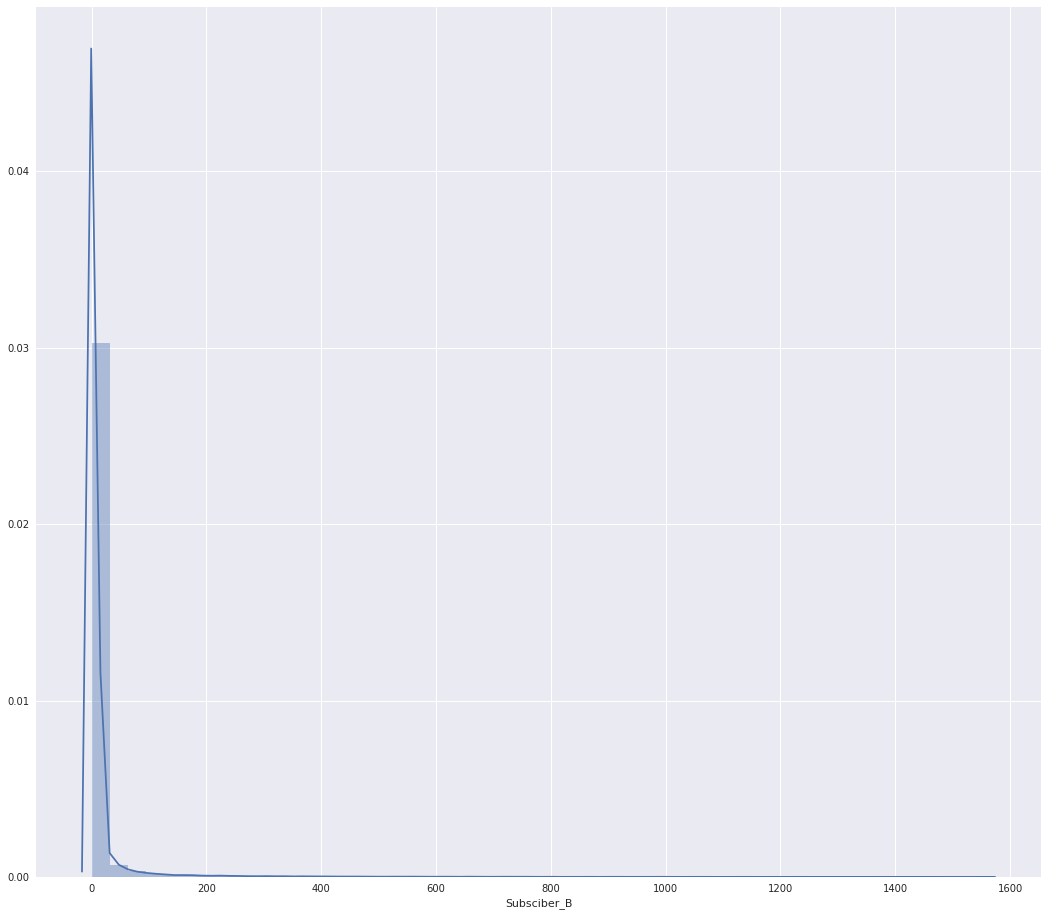

In [16]:
vc2 = real_data['Subsciber_B'].value_counts()
sns.distplot(vc2)

In [36]:
from collections import defaultdict, Counter
call_counts = Counter()
for i, r in real_data.iterrows():
    if (i+1)%10000 ==0:
        print("Processing", i)
    key = min(str(r['Subscriber_A']), str(r['Subsciber_B'])) + ":" + max(str(r['Subscriber_A']), str(r['Subsciber_B']))
    call_counts[key] += 1
call_counts.most_common(200)

Processing 149999
Processing 179999
Processing 189999
Processing 199999
Processing 209999
Processing 219999
Processing 229999
Processing 239999
Processing 249999
Processing 259999
Processing 269999
Processing 279999
Processing 289999
Processing 299999
Processing 309999
Processing 319999
Processing 329999
Processing 339999
Processing 349999
Processing 359999
Processing 369999
Processing 379999
Processing 389999
Processing 399999
Processing 409999
Processing 419999
Processing 429999
Processing 439999
Processing 449999
Processing 459999
Processing 469999
Processing 479999
Processing 489999
Processing 499999
Processing 509999
Processing 519999
Processing 529999
Processing 539999
Processing 549999
Processing 559999
Processing 569999
Processing 579999
Processing 589999
Processing 599999
Processing 609999
Processing 619999
Processing 629999
Processing 639999
Processing 649999
Processing 659999
Processing 669999
Processing 679999
Processing 689999
Processing 699999
Processing 709999
Processing

[('0x25D442A627753AC4443E66FA32A377C6:0xDBBCE4E39A3FC769A1E685660A25739C',
  1056),
 ('0x78E075D71974D0BA6BAED899AFE6C383:0x8B42C630D468330C5B39F7286FA81F2C',
  754),
 ('0x1C3EAAD29D8D62AE6F2DF0875E11F9EF:0x50B2C4AA7F2B2FE86FA5F27136A8C2FE',
  728),
 ('0xDD1391C8E1B9A5DDF4F8E388BAB193DB:0xF4AAA35100D73382A32E76FBE248ABD9',
  640),
 ('0x105841DC2B4F4D59BB35A92BD41C6DC1:0xA1997CEFF21C621D0A5BD6B0C83D0AAB',
  610),
 ('0x7F531D06983DE0192F3A8827E2CCD723:0x92C0BA359B674D2452C18C53A85B45BC',
  596),
 ('0x2F18659B8E28E5D93079D498A90DC2C7:0xC9086FA66A4511265AE1FB343FB2FB06',
  588),
 ('0x550763B07D757FFDB08EE85258CE80BB:0x6A68CEFEA93EAAA35D57D34E3FB736F9',
  584),
 ('0x4384E72D41A107ED7819B74264C7E448:0xF3BB34265B5A63029E0C4E512560B1A4',
  574),
 ('0x402F4323BCE33C50292BE9C7838B2CFC:0xD48559216AA5AD5FC5853E4F7F18BF85',
  572),
 ('0xDB254AA204F08792BF42FEDF0091D9DA:0xFC9F8B7909C052C652C38116FD5231C4',
  572),
 ('0x8F6B98E0A09DF9FBD2261DBB3D916E5E:0xA01805FD3A62AD78E55C52A29E8F2A82',
  566),
 ('

In [37]:
len(call_counts)

156053

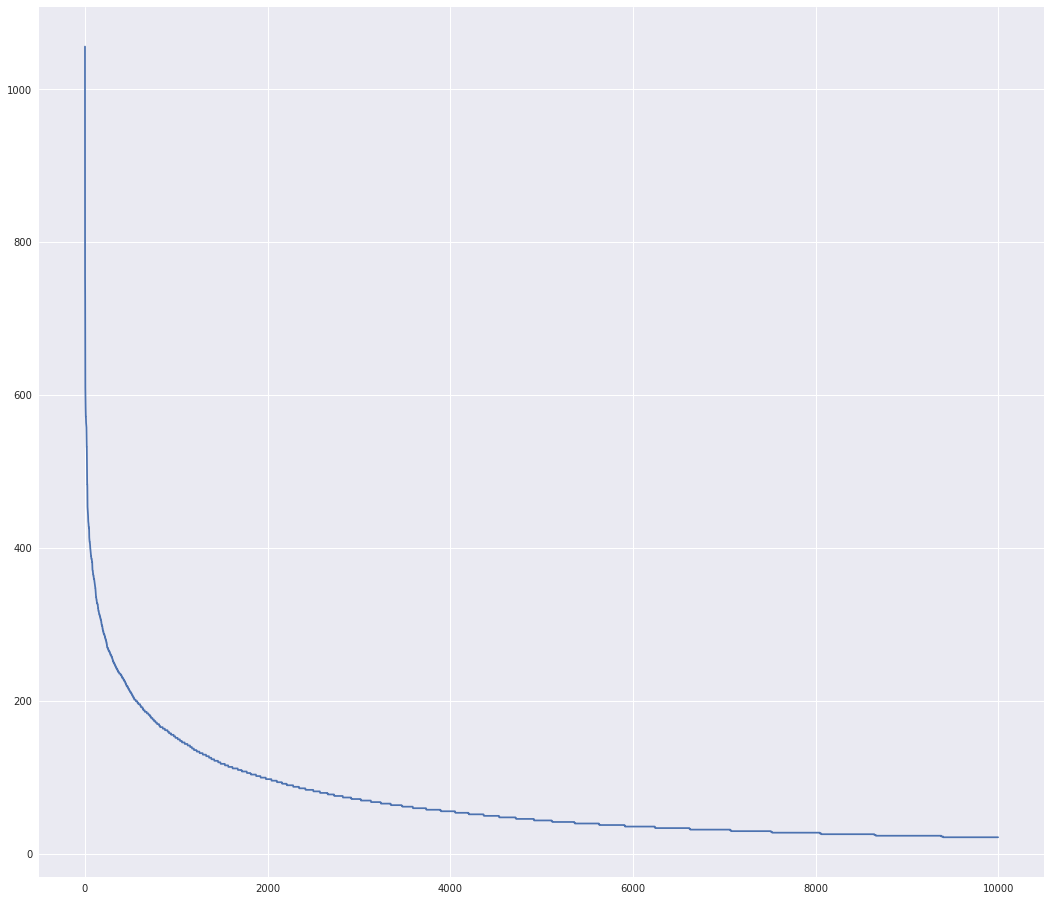

In [45]:
xs = np.arange(10000)
ys= [x[1] for x in call_counts.most_common(10000)]
plt.plot(xs,ys)


In [51]:
vals = [x for x in call_counts.values()]
np.mean(vals), np.std(vals)

(8.179374955944455, 24.34986342249019)